In [1]:
import xarray as xr

In [6]:
path = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_old'

In [8]:
ds = xr.open_rasterio(path+'/1982/19820104-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.tif')
ds

<xarray.DataArray (band: 2, y: 500, x: 1000)>
[1000000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * x        (x) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0
Attributes:
    transform:      (0.05, 0.0, 60.0, 0.0, -0.05, 45.0)
    crs:            +proj=longlat +ellps=WGS84 +no_defs=True
    res:            (0.05, 0.05)
    is_tiled:       0
    nodatavals:     (255.0, 255.0)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    AREA_OR_POINT:  Area

- 0-100 SCF [%]; 0 = snow free; 100 = fully snow covered
- 205 Cloud masked (including cloud shadow)
- 206 Satellite data available, but polar night
- 210 Water
- 215 Glaciers, icecaps, ice sheets
- 254 ERROR: No

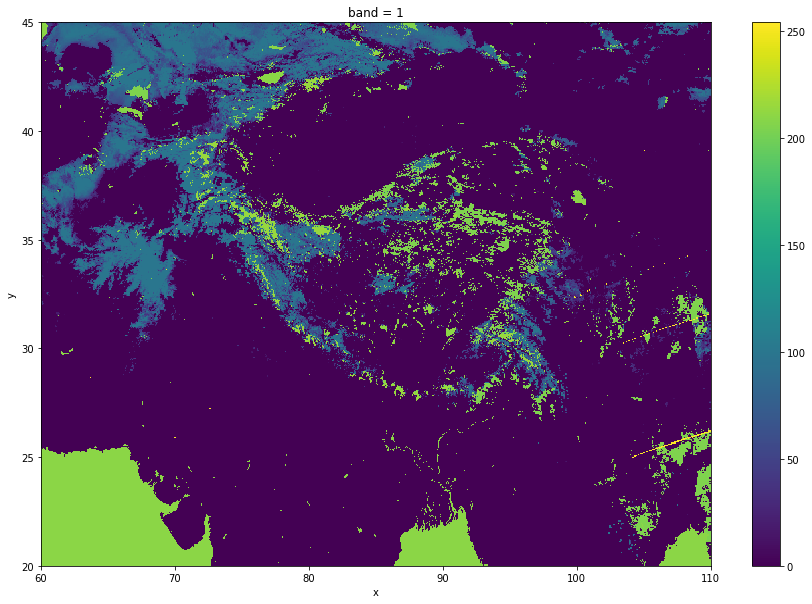

In [9]:
ds.sel(band=1).plot(figsize=(15,10))

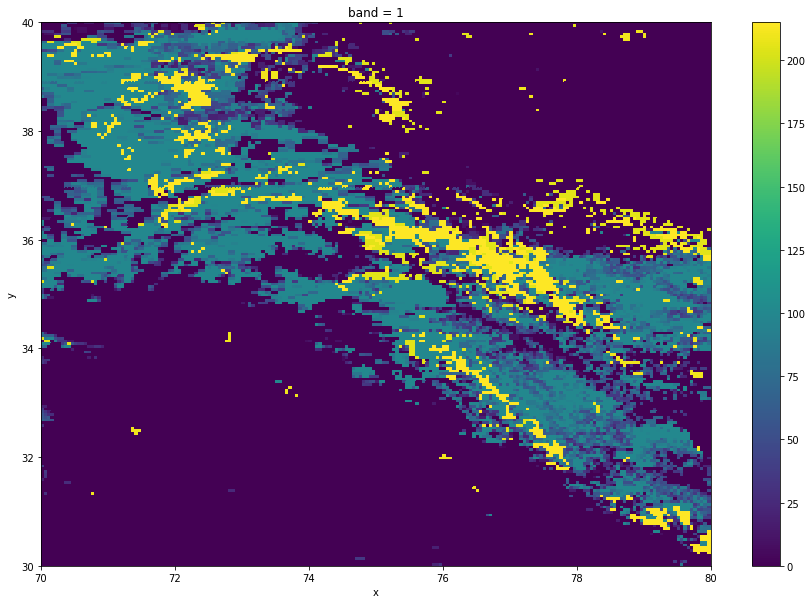

In [10]:
ds.sel(band=1).sel(y=slice(40,30), x=slice(70,80)).plot(figsize=(15,10))

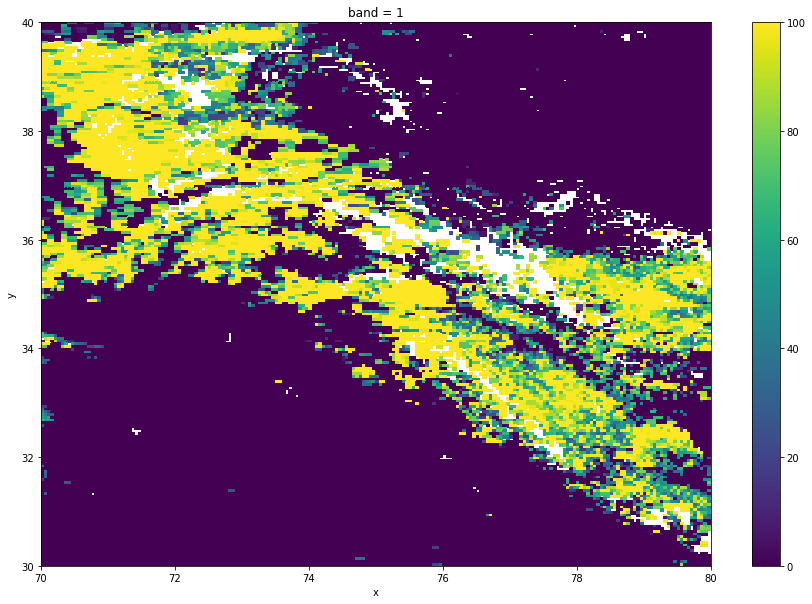

In [11]:
ds.sel(band=1).where(ds.sel(band=1) <= 100).sel(y=slice(40,30), x=slice(70,80)).plot(figsize=(15,10))

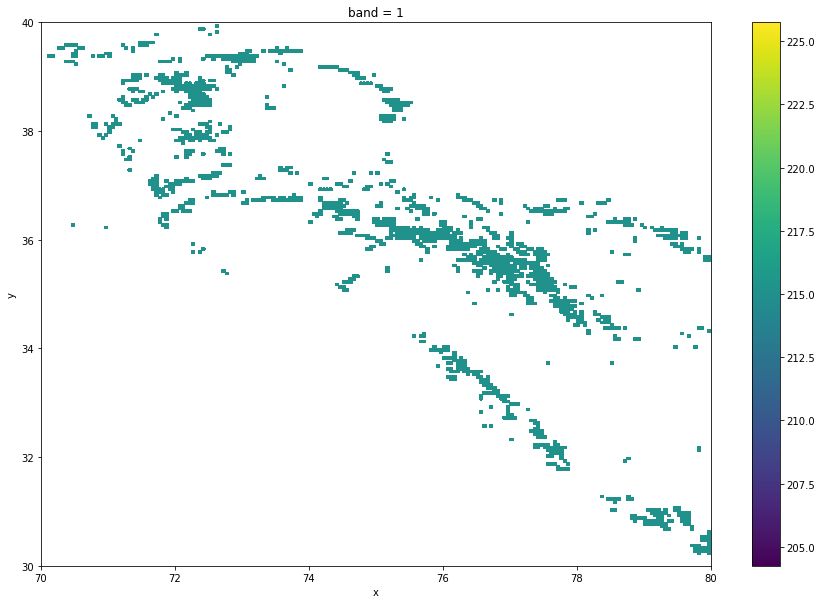

In [17]:
# Chekc glaciers
ds.sel(band=1).where(ds.sel(band=1) == 215).sel(y=slice(40,30), x=slice(70,80)).plot(figsize=(15,10))

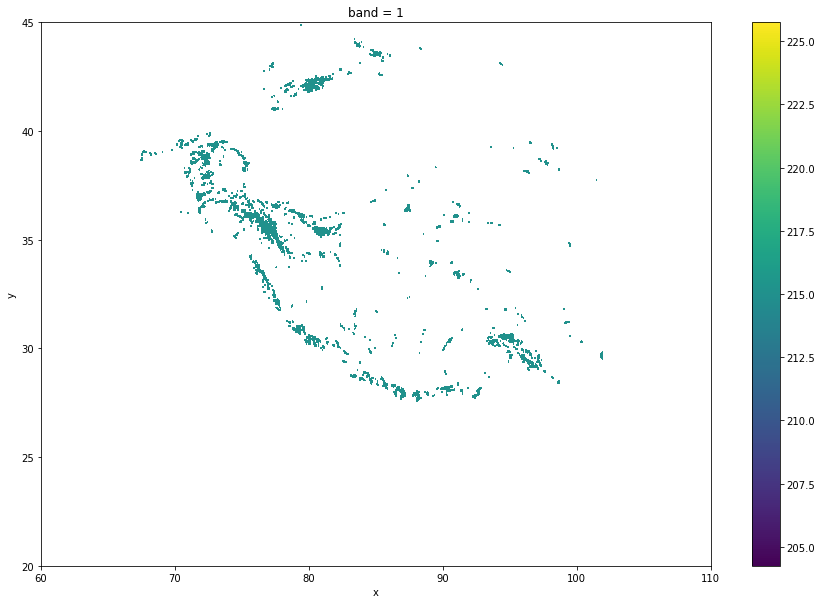

In [16]:
# Chekc glaciers
ds.sel(band=1).where(ds.sel(band=1) == 215).plot(figsize=(15,10))

In [19]:
da = ds.sel(band=1).sel(y=slice(40,30), x=slice(70,80))

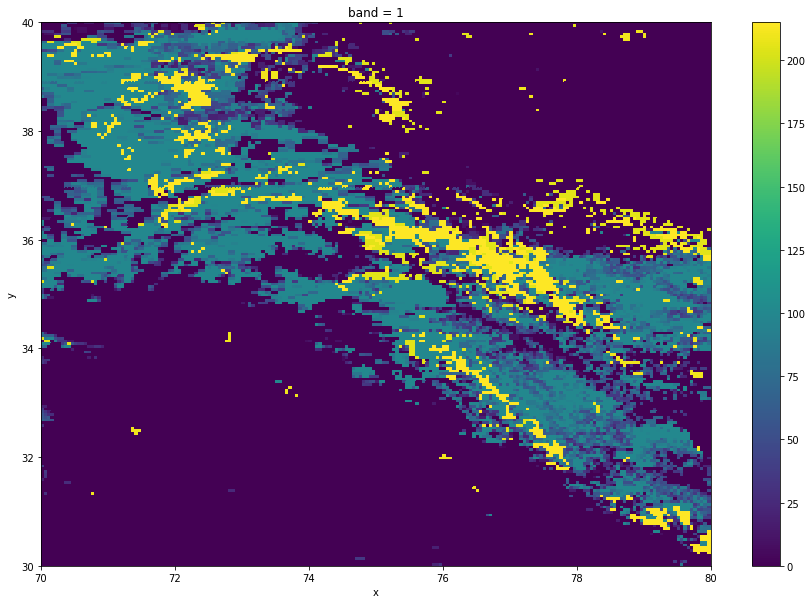

In [20]:
da.plot(figsize=(15,10))

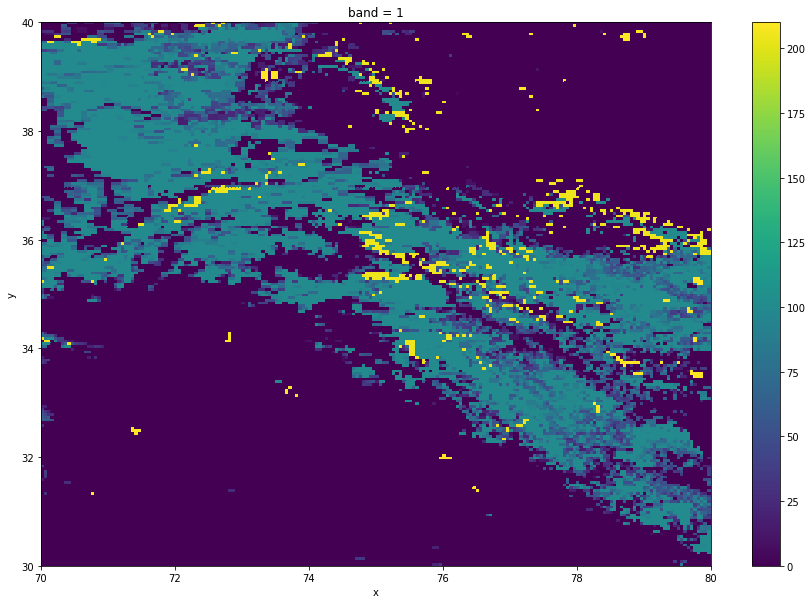

In [21]:
# Replace glaciers by 100% snow
da.where(da != 215, other=100).plot(figsize=(15,10))

In [22]:
da_ice_filled = da.where(da != 215, other=100)

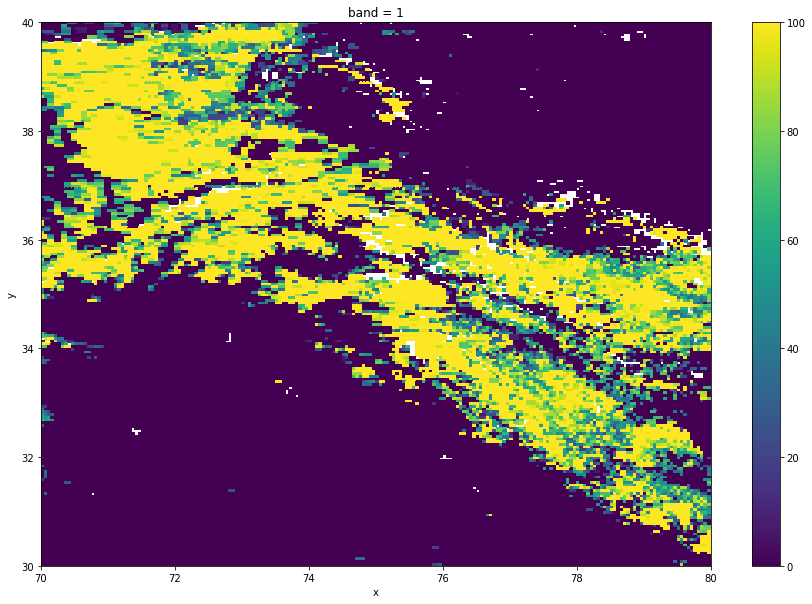

In [23]:
da_ice_filled.where(da_ice_filled <= 100).plot(figsize=(15,10))

## Get data with and without glaciers filled

In [24]:
da = ds.sel(band=1).where(ds.sel(band=1) <= 100)
da = da.rename({'y': 'lat', 'x': 'lon'})
da = da.drop('band')

da_ice_filled = ds.sel(band=1).where(ds.sel(band=1) != 215, other=100)
da_ice_filled = da_ice_filled.where(da_ice_filled <= 100)
da_ice_filled = da_ice_filled.rename({'y': 'lat', 'x': 'lon'})
da_ice_filled = da_ice_filled.drop('band')

da

<xarray.DataArray (lat: 500, lon: 1000)>
array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0
Attributes:
    transform:      (0.05, 0.0, 60.0, 0.0, -0.05, 45.0)
    crs:            +proj=longlat +ellps=WGS84 +no_defs=True
    res:            (0.05, 0.05)
    is_tiled:       0
    nodatavals:     (255.0, 255.0)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    AREA_OR_POINT:  Area

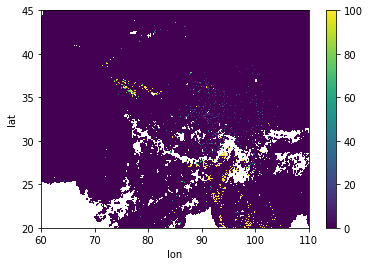

In [25]:
da.plot()

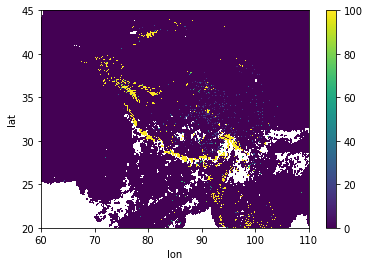

In [26]:
da_ice_filled.plot()

# Save all data to nc

In [27]:
import pandas as pd
import os.path

In [28]:
path_out = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_nc'

In [79]:
da.assign_coords({'time': date})

<xarray.DataArray (lat: 500, lon: 1000)>
array([[nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0
    time     datetime64[ns] 2014-12-31
Attributes:
    transform:      (0.05, 0.0, 60.0, 0.0, -0.05, 45.0)
    crs:            +proj=longlat +ellps=WGS84 +no_defs=True
    res:            (0.05, 0.05)
    is_tiled:       0
    nodatavals:     (255.0, 255.0)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    AREA_OR_POINT:  Area

In [87]:
for date in pd.date_range('1982-01-04', '2014-12-31'):
# for date in pd.date_range('1982-01-04', '1982-01-06'):
    print(date)
    date_str = str(date)[:10].replace('-', '')
    year = date_str[:4]
    
    filename = path+'/'+year+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.tif'
    
    if os.path.isfile(filename):
        ds = xr.open_rasterio(filename)
        da = ds.sel(band=1).where(ds.sel(band=1) <= 100)
        da = da.rename({'y': 'lat', 'x': 'lon'})
        da = da.drop('band')
        da = da.assign_coords({'time': date}).expand_dims('time')

        da.to_netcdf(path_out+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.nc')
    

1982-01-04 00:00:00
1982-01-05 00:00:00
1982-01-06 00:00:00
1982-01-07 00:00:00
1982-01-08 00:00:00
1982-01-09 00:00:00
1982-01-10 00:00:00
1982-01-11 00:00:00
1982-01-12 00:00:00
1982-01-13 00:00:00
1982-01-14 00:00:00
1982-01-15 00:00:00
1982-01-16 00:00:00
1982-01-17 00:00:00
1982-01-18 00:00:00
1982-01-19 00:00:00
1982-01-20 00:00:00
1982-01-21 00:00:00
1982-01-22 00:00:00
1982-01-23 00:00:00
1982-01-24 00:00:00
1982-01-25 00:00:00
1982-01-26 00:00:00
1982-01-27 00:00:00
1982-01-28 00:00:00
1982-01-29 00:00:00
1982-01-30 00:00:00
1982-01-31 00:00:00
1982-02-01 00:00:00
1982-02-02 00:00:00
1982-02-03 00:00:00
1982-02-04 00:00:00
1982-02-05 00:00:00
1982-02-06 00:00:00
1982-02-07 00:00:00
1982-02-08 00:00:00
1982-02-09 00:00:00
1982-02-10 00:00:00
1982-02-11 00:00:00
1982-02-12 00:00:00
1982-02-13 00:00:00
1982-02-14 00:00:00
1982-02-15 00:00:00
1982-02-16 00:00:00
1982-02-17 00:00:00
1982-02-18 00:00:00
1982-02-19 00:00:00
1982-02-20 00:00:00
1982-02-21 00:00:00
1982-02-22 00:00:00


In [29]:
for date in pd.date_range('1982-01-04', '2014-12-31'):
# for date in pd.date_range('1982-01-04', '1982-01-06'):
    print(date)
    date_str = str(date)[:10].replace('-', '')
    year = date_str[:4]
    
    filename = path+'/'+year+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.tif'
    
    if os.path.isfile(filename):
        ds = xr.open_rasterio(filename)
        da_ice_filled = ds.sel(band=1).where(ds.sel(band=1) != 215, other=100)
        da_ice_filled = da_ice_filled.where(da_ice_filled <= 100)
        da_ice_filled = da_ice_filled.rename({'y': 'lat', 'x': 'lon'})
        da_ice_filled = da_ice_filled.drop('band')
        da_ice_filled = da_ice_filled.assign_coords({'time': date}).expand_dims('time')

        da_ice_filled.to_netcdf(path_out+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_icefilled.nc')
    

1982-01-04 00:00:00
1982-01-05 00:00:00
1982-01-06 00:00:00
1982-01-07 00:00:00
1982-01-08 00:00:00
1982-01-09 00:00:00
1982-01-10 00:00:00
1982-01-11 00:00:00
1982-01-12 00:00:00
1982-01-13 00:00:00
1982-01-14 00:00:00
1982-01-15 00:00:00
1982-01-16 00:00:00
1982-01-17 00:00:00
1982-01-18 00:00:00
1982-01-19 00:00:00
1982-01-20 00:00:00
1982-01-21 00:00:00
1982-01-22 00:00:00
1982-01-23 00:00:00
1982-01-24 00:00:00
1982-01-25 00:00:00
1982-01-26 00:00:00
1982-01-27 00:00:00
1982-01-28 00:00:00
1982-01-29 00:00:00
1982-01-30 00:00:00
1982-01-31 00:00:00
1982-02-01 00:00:00
1982-02-02 00:00:00
1982-02-03 00:00:00
1982-02-04 00:00:00
1982-02-05 00:00:00
1982-02-06 00:00:00
1982-02-07 00:00:00
1982-02-08 00:00:00
1982-02-09 00:00:00
1982-02-10 00:00:00
1982-02-11 00:00:00
1982-02-12 00:00:00
1982-02-13 00:00:00
1982-02-14 00:00:00
1982-02-15 00:00:00
1982-02-16 00:00:00
1982-02-17 00:00:00
1982-02-18 00:00:00
1982-02-19 00:00:00
1982-02-20 00:00:00
1982-02-21 00:00:00
1982-02-22 00:00:00


# Make monthly mean

In [30]:
path_nc = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_nc'
path_mon = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_monthly'

In [32]:
ds = xr.open_mfdataset(path_nc+'/*gapfilled.nc')
ds

<xarray.Dataset>
Dimensions:                        (lat: 500, lon: 1000, time: 11944)
Coordinates:
  * lat                            (lat) float64 44.98 44.92 ... 20.07 20.02
  * lon                            (lon) float64 60.02 60.08 ... 109.9 110.0
  * time                           (time) datetime64[ns] 1982-01-04 ... 2014-...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 dask.array<chunksize=(1, 500, 1000), meta=np.ndarray>

In [33]:
ds_icefilled = xr.open_mfdataset(path_nc+'/*gapfilled_icefilled.nc')
ds_icefilled

<xarray.Dataset>
Dimensions:                        (lat: 500, lon: 1000, time: 11944)
Coordinates:
  * lat                            (lat) float64 44.98 44.92 ... 20.07 20.02
  * lon                            (lon) float64 60.02 60.08 ... 109.9 110.0
  * time                           (time) datetime64[ns] 1982-01-04 ... 2014-...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 dask.array<chunksize=(1, 500, 1000), meta=np.ndarray>

In [34]:
da = ds.__xarray_dataarray_variable__.resample(time='M').mean('time')
da

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


<xarray.DataArray '__xarray_dataarray_variable__' (time: 396, lat: 500, lon: 1000)>
dask.array<where, shape=(396, 500, 1000), dtype=float64, chunksize=(4, 500, 1000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2014-12-31
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0

In [35]:
da_icefilled = ds_icefilled.__xarray_dataarray_variable__.resample(time='M').mean('time')
da_icefilled

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


<xarray.DataArray '__xarray_dataarray_variable__' (time: 396, lat: 500, lon: 1000)>
dask.array<where, shape=(396, 500, 1000), dtype=float64, chunksize=(4, 500, 1000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2014-12-31
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0

In [36]:
da.name = 'snc'
da_icefilled.name = 'snc'

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


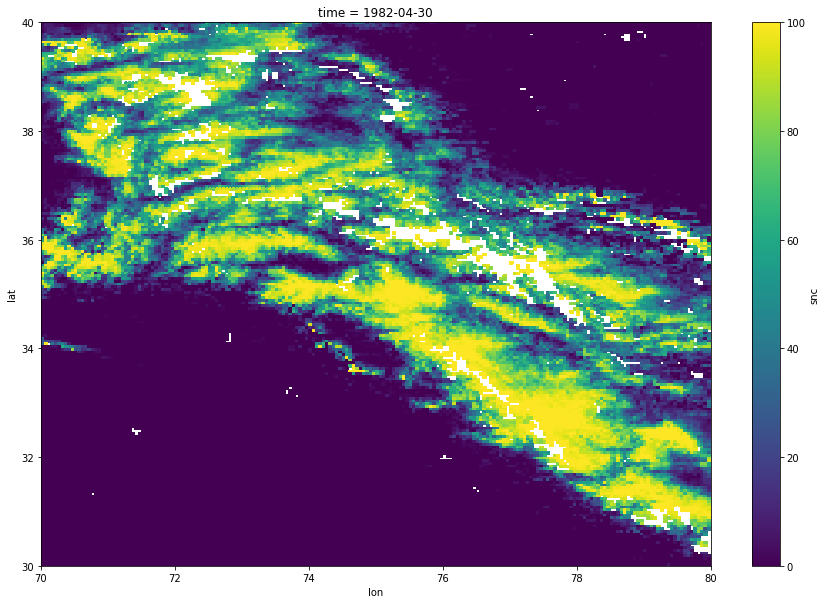

In [38]:
da[3].sel(lat=slice(40,30), lon=slice(70,80)).plot(figsize=(15,10))

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


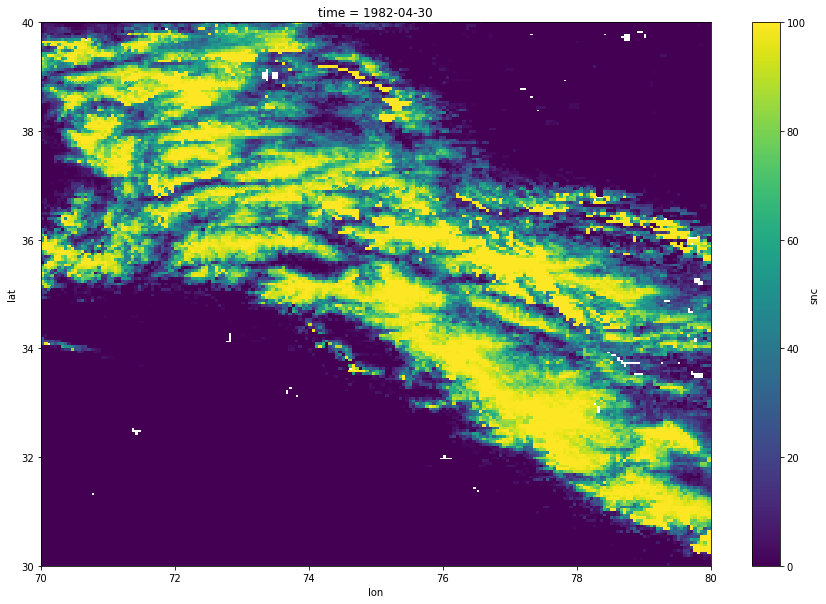

In [39]:
da_icefilled[3].sel(lat=slice(40,30), lon=slice(70,80)).plot(figsize=(15,10))

In [103]:
da.to_netcdf(path_mon+'/ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_montlhy_1982-2014.nc')

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [40]:
da_icefilled.to_netcdf(path_mon+'/ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_icefilled_montlhy_1982-2014.nc')

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [41]:
ds = xr.open_dataset('GMTED2010_15n015_00625deg.nc').drop_dims('nbounds').swap_dims(
    {'nlat': 'latitude', 'nlon': 'longitude'}).drop({'nlat', 'nlon'}).rename(
    {'latitude': 'lat', 'longitude': 'lon'}).sel(lat=slice(20,45), lon=slice(60,110))
elevation = ds.elevation

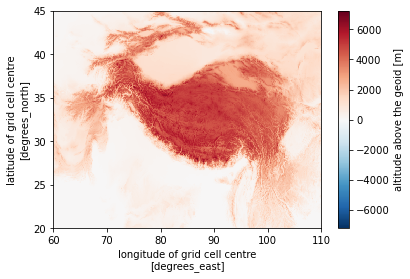

In [42]:
elevation.plot()

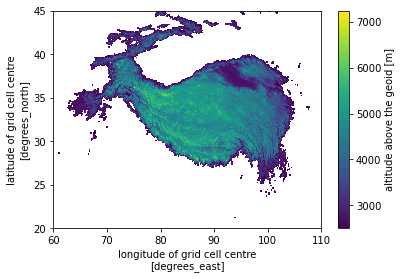

In [43]:
elevation.where(elevation > 2500).plot()

In [44]:
import xesmf as xe

In [45]:
regridder = xe.Regridder(elevation, da, 'bilinear', periodic=False, reuse_weights=True)
elevation_regrid = regridder(elevation)

Reuse existing file: bilinear_400x800_500x1000.nc


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


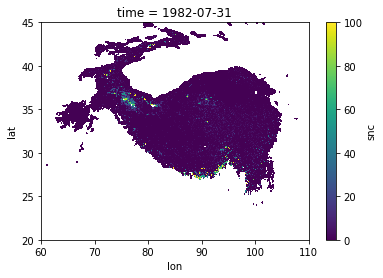

In [46]:
da.where(elevation_regrid > 2500)[6].plot()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


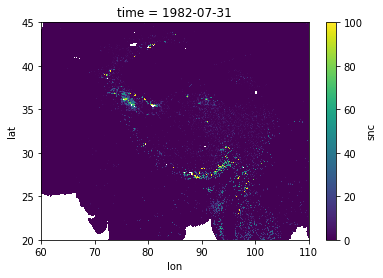

In [47]:
da[6].plot()

In [48]:
import sys
sys.path.insert(1, '/home/lalandmi/Dropbox/Thèse/notebooks/utils') # to include my util file in previous directory
import utils as u

In [49]:
da.load()
da_icefilled.load()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'snc' (time: 396, lat: 500, lon: 1000)>
array([[[        nan,         nan,         nan, ..., 33.66666667,
         35.58333333, 32.13043478],
        [        nan,         nan,         nan, ...,  6.08695652,
         12.5       ,  5.875     ],
        [        nan,         nan,         nan, ...,  0.        ,
          5.33333333,  0.        ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,  8.96153846,
         18.57692308,  6.11538462],
        [        nan,         nan,         nan, ...,  4.11538462,
          8.5       ,  4.23076923],
        [        nan,         nan,         nan, ...,  2.15384615,
          2.15384615,  2.15384615],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,  0.        ,
          0.        ,  0.        ],
        [        nan,         nan,         nan, ...,  0.        ,
          0.        ,  2.83870968],
        [        nan,         nan,         nan, ...,  0.        ,
          2.22580645,  2.22580645],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2014-12-31
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 109.8 109.9 109.9 110.0

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


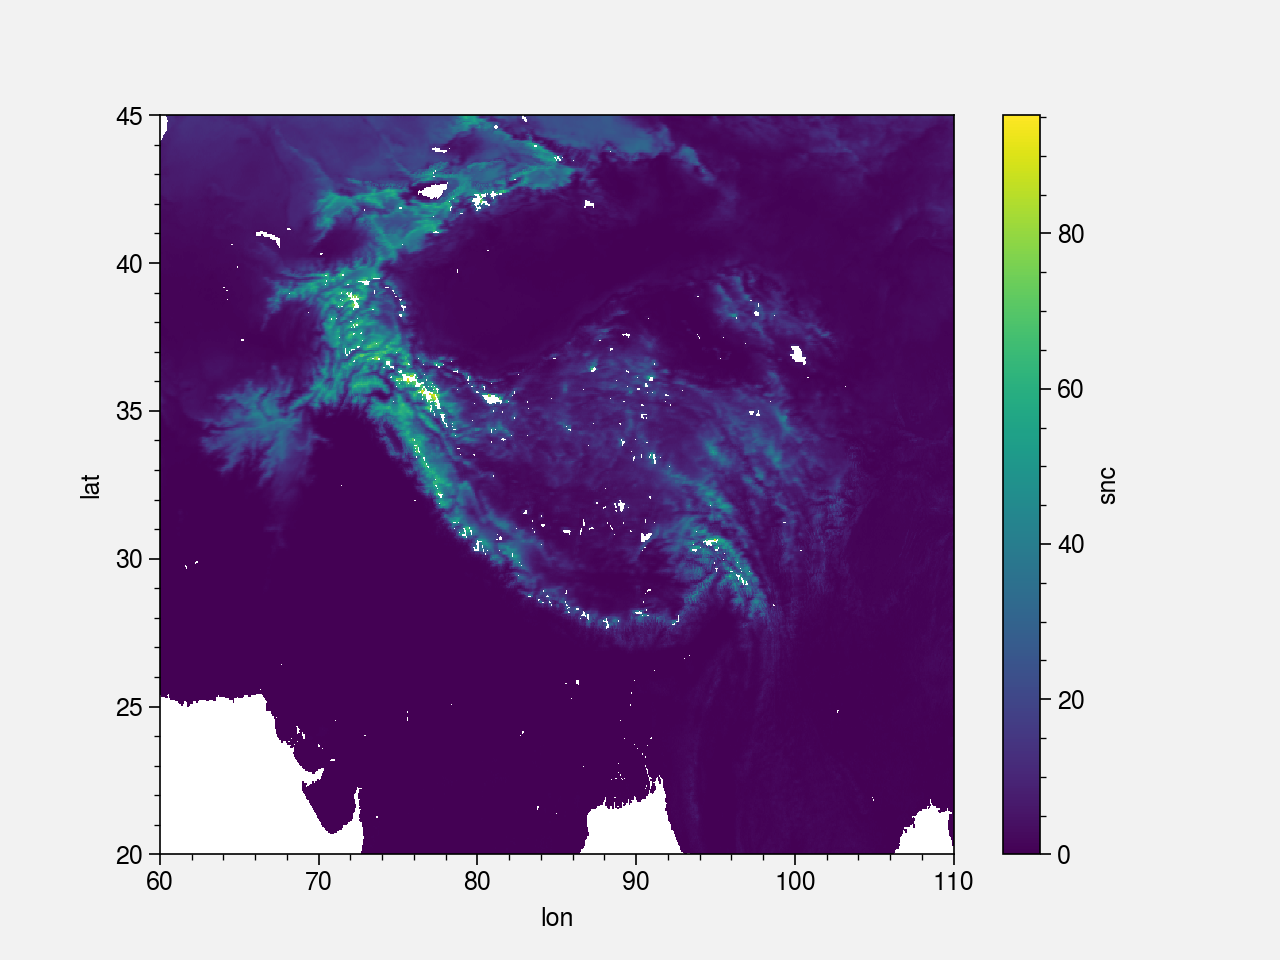

In [50]:
da.mean('time').plot()

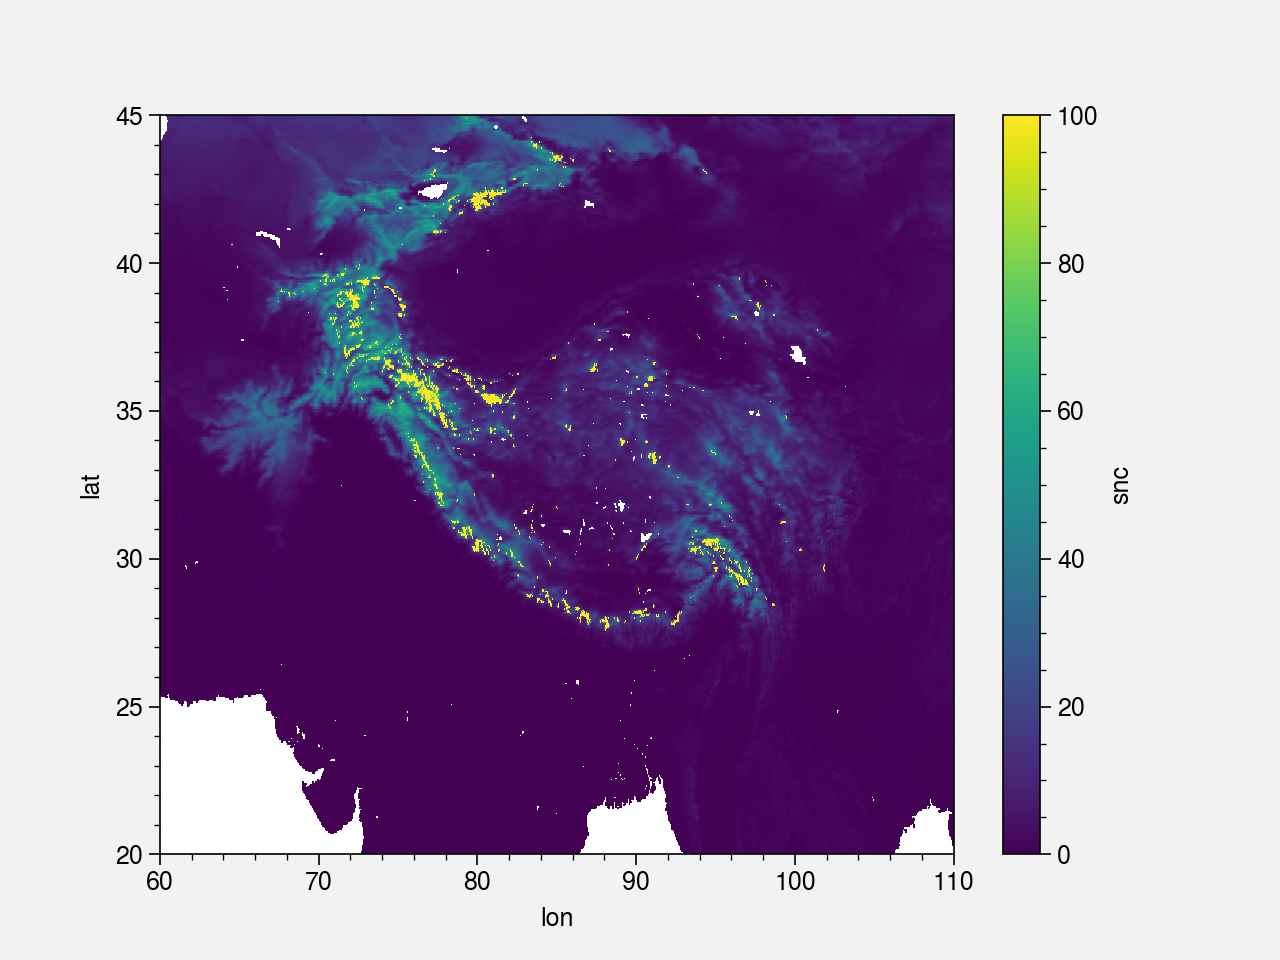

In [51]:
da_icefilled.mean('time').plot()

In [52]:
ac = u.spatial_average(u.annual_cycle(da.where(elevation_regrid > 2500), skipna=True))

In [53]:
ac_icefilled = u.spatial_average(u.annual_cycle(da_icefilled.where(elevation_regrid > 2500), skipna=True))

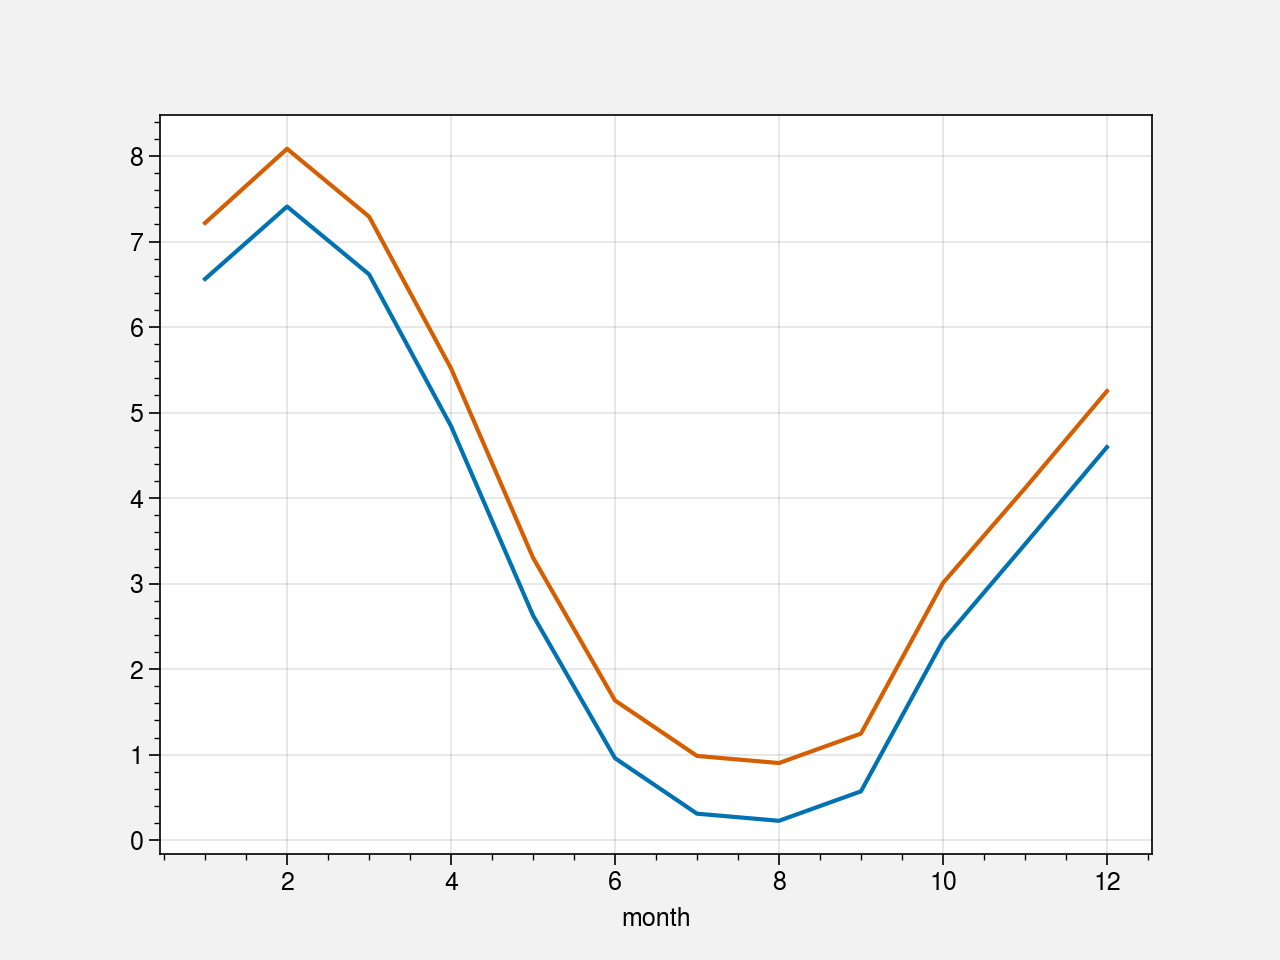

In [54]:
ac.plot()
ac_icefilled.plot()